# Regressão Linear Simples - Trabalho

## Estudo de caso: Seguro de automóvel sueco

Agora, sabemos como implementar um modelo de regressão linear simples. Vamos aplicá-lo ao conjunto de dados do seguro de automóveis sueco. Esta seção assume que você baixou o conjunto de dados para o arquivo insurance.csv, o qual está disponível no notebook respectivo.

O conjunto de dados envolve a previsão do pagamento total de todas as reclamações em milhares de Kronor sueco, dado o número total de reclamações. É um dataset composto por 63 observações com 1 variável de entrada e 1 variável de saída. Os nomes das variáveis são os seguintes:

1. Número de reivindicações.
2. Pagamento total para todas as reclamações em milhares de Kronor sueco.

Voce deve adicionar algumas funções acessórias à regressão linear simples. Especificamente, uma função para carregar o arquivo CSV chamado *load_csv ()*, uma função para converter um conjunto de dados carregado para números chamado *str_column_to_float ()*, uma função para avaliar um algoritmo usando um conjunto de treino e teste chamado *split_train_split ()*, a função para calcular RMSE chamado *rmse_metric ()* e uma função para avaliar um algoritmo chamado *evaluate_algorithm()*.

Utilize um conjunto de dados de treinamento de 60% dos dados para preparar o modelo. As previsões devem ser feitas nos restantes 40%. 

Compare a performabce do seu algoritmo com o algoritmo baseline, o qual utiliza a média dos pagamentos realizados para realizar a predição ( a média é 72,251 mil Kronor).


In [2]:
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from math import sqrt
import pandas as pd
import numpy as np

In [3]:
def load_csv(filename):
    dataset = pd.read_csv(filename, header=None)
    return dataset

In [4]:
dataset = load_csv('insurance.csv')
dataset.head()

,0,1
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


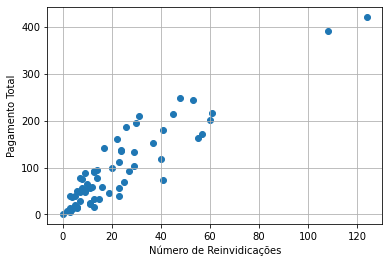

In [5]:
plt.scatter(dataset[0],dataset[1])
plt.xlabel('Número de Reinvidicações')
plt.ylabel('Pagamento Total')

plt.grid(True)

In [6]:
def mean(values):
    return sum(values) / float(len(values))

def variance(values, mean):
    return sum([pow(x-mean,2) for x in values])

In [7]:
def covariance(x, mean_x, y, mean_y):
    covar = 0.0
    for i in range(len(x)):
        covar += (x[i] - mean_x) * (y[i] - mean_y)
    return covar

In [8]:
def coefficients(dataset):
    x = [row[0] for row in dataset]
    y = [row[1] for row in dataset]
    x_mean, y_mean = mean(x), mean(y)
    b1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
    b0 = y_mean - b1 * x_mean
    return [b0, b1]

In [9]:
def simple_linear_regression(train, test):
    predictions = list()
    b0, b1 = coefficients(train)
    for row in test:
        ypred = b0 + b1 * row[0]
        predictions.append(ypred)
    return predictions 

In [10]:
dataset = load_csv('insurance.csv')
ds_train, ds_test = train_test_split(dataset.values, test_size = 0.4)
simple_linear_regression(ds_train, ds_test)

[35.938803264202065,
 45.61677508618938,
 103.68460601811327,
 45.61677508618938,
 58.5207375155058,
 194.0123430233282,
 32.712812656872956,
 42.39078447886027,
 177.88238998668268,
 94.00663419612596,
 42.39078447886027,
 68.19870933749311,
 29.486822049543854,
 45.61677508618938,
 219.82026788196106,
 39.16479387153117,
 152.07446512804984,
 64.97271873016402,
 35.938803264202065,
 64.97271873016402,
 42.39078447886027,
 77.87668115948043,
 74.65069055215133,
 106.91059662544238,
 119.8145590547588,
 110.13658723277148]

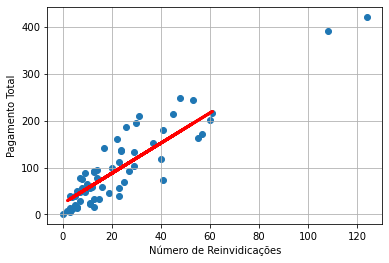

In [11]:
plt.scatter(dataset.values[:,0], dataset.values[:,1])
plt.plot(ds_test[:,0], simple_linear_regression(ds_train, ds_test), color='red', linewidth=3)

plt.xlabel('Número de Reinvidicações')
plt.ylabel('Pagamento Total')

plt.grid(True)

In [12]:
def evaluate_algorithm(dataset, algorithm):
    test_set = list()
    for row in dataset:
        row_copy = list(row)
        row_copy[-1] = None
        test_set.append(row_copy)
    predicted = algorithm(dataset, test_set)
    #print(predicted)
    actual = [row[-1] for row in dataset]
    rmse = rmse_metric(actual, predicted)
    return rmse

In [13]:
def rmse_metric(actual, predicted):
    sum_error = 0.0
    for i in range(len(actual)):
        prediction_error = predicted[i] - actual[i]
        sum_error += (prediction_error ** 2)
    mean_error = sum_error / float(len(actual))
    return sqrt(mean_error)

In [15]:
evalLinear = evaluate_algorithm(ds_train, simple_linear_regression)

print ("RSME para Regressao linear = {:f}".format(evalLinear))

RSME para Regressao linear = 32.564940
